In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Importing LazyClassifier 
from lazypredict.Supervised import LazyClassifier

# The below code removes all the warnings during execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Abhiyansh\\Finalproject\\clean-data.csv")
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


<Axes: xlabel='Dangerous'>

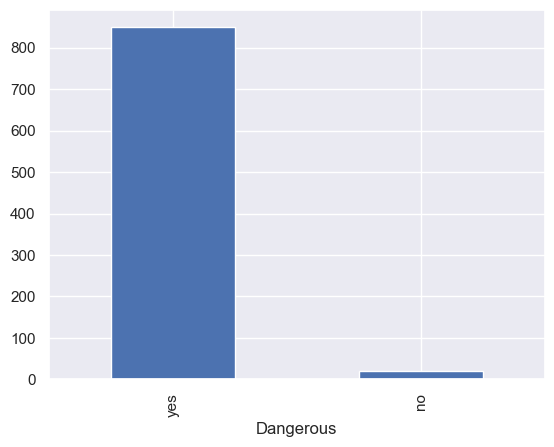

In [3]:
df['Dangerous'].value_counts().plot(kind = "bar")

<Axes: xlabel='AnimalName'>

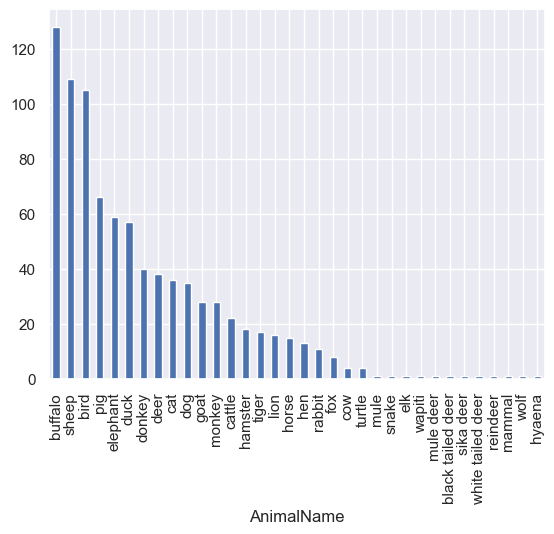

In [4]:
df['AnimalName'].value_counts().plot(kind = "bar")

In [5]:
def encode(df, cols):
    unique_values = set()
    for col in cols:
        curr_unique = list(df[col].unique())
        for ele in curr_unique:
            unique_values.add(ele)
    unique_values = list(unique_values)
    unique_values.sort()
    encode_map = {}
    for index, value in enumerate(unique_values):
        encode_map[value] = index
    return encode_map

In [6]:
animal_encoding = encode(df, ['AnimalName'])
symptoms_encoding = encode(df, ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5'])
dangerous_encoding = encode(df, ['Dangerous'])

In [7]:
df['AnimalName'] = df['AnimalName'].map(animal_encoding)

df['symptoms1'] = df['symptoms1'].map(symptoms_encoding)
df['symptoms2'] = df['symptoms2'].map(symptoms_encoding)
df['symptoms3'] = df['symptoms3'].map(symptoms_encoding)
df['symptoms4'] = df['symptoms4'].map(symptoms_encoding)
df['symptoms5'] = df['symptoms5'].map(symptoms_encoding)

df['Dangerous'] = df['Dangerous'].map(dangerous_encoding)

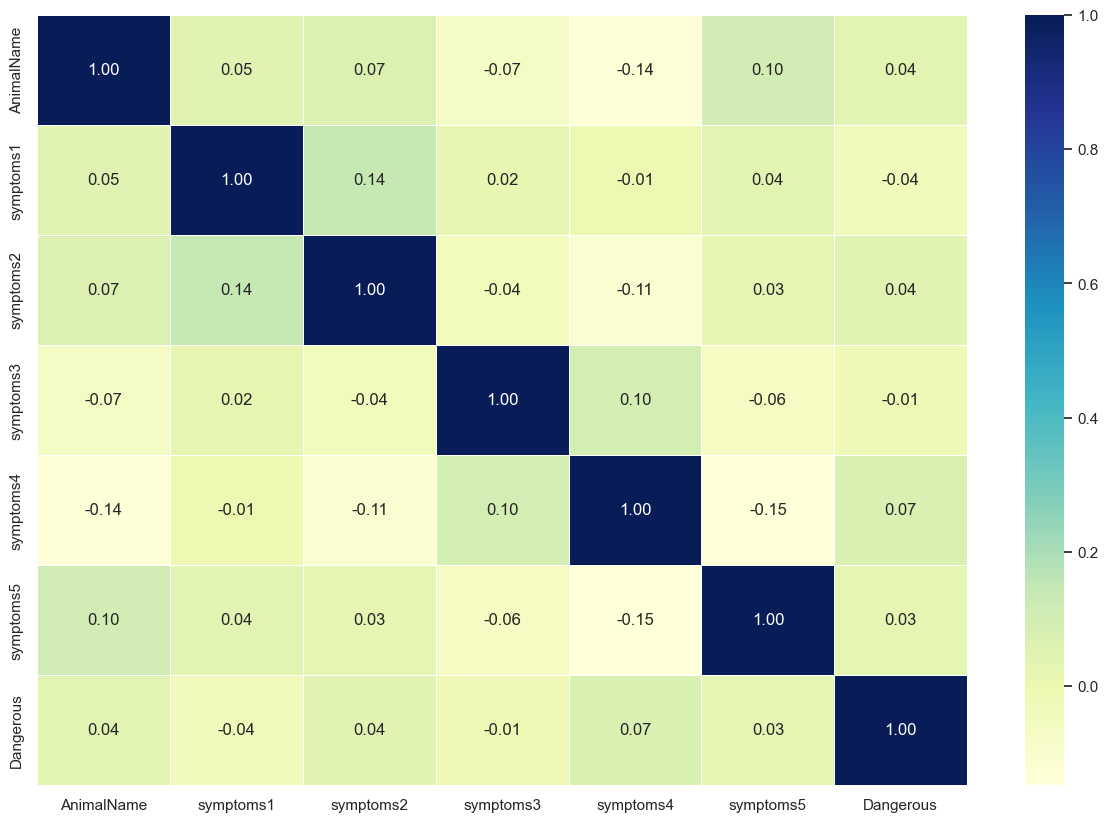

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [9]:
df.to_csv("encoded-data.csv", index = False)

In [10]:
df = pd.read_csv("C:\\Users\\Abhiyansh\\Finalproject\\encoded-data.csv")
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,7,221,130,705,726,127,1
1,7,221,130,105,672,428,1
2,7,221,130,105,705,21,1
3,7,221,72,105,338,590,1
4,7,221,130,105,338,66,1


In [11]:
X = df.drop("Dangerous", axis = 1)
y = df['Dangerous']

In [12]:
X.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5
0,7,221,130,705,726,127
1,7,221,130,105,672,428
2,7,221,130,105,705,21
3,7,221,72,105,338,590
4,7,221,130,105,338,66


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dangerous, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [15]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None, 
                     random_state = 42, 
                     predictions = True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 17.20it/s]

[LightGBM] [Info] Number of positive: 423, number of negative: 11
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 434, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.974654 -> initscore=3.649477
[LightGBM] [Info] Start training from score 3.649477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [16]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.99,0.67,0.67,0.98,0.18
AdaBoostClassifier,0.98,0.67,0.67,0.98,0.13
LGBMClassifier,0.98,0.66,0.66,0.98,0.58
DecisionTreeClassifier,0.97,0.66,0.66,0.97,0.02
BaggingClassifier,0.97,0.61,0.61,0.97,0.05
ExtraTreeClassifier,0.97,0.60,0.60,0.97,0.01
NearestCentroid,0.64,0.60,0.60,0.76,0.02
XGBClassifier,0.98,0.56,0.56,0.97,0.08
LabelPropagation,0.97,0.55,0.55,0.97,0.02


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'encoded-data.csv'  # Replace with the actual file path if different
df = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = df.drop("Dangerous", axis=1)
y = df["Dangerous"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy: 98.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       172

    accuracy                           0.99       174
   macro avg       0.49      0.50      0.50       174
weighted avg       0.98      0.99      0.98       174



In [18]:
# Example test case (replace these values with realistic ones based on your dataset)
test_input = {
    "AnimalName": 7,  # Replace with valid category
    "symptoms1": 221,
    "symptoms2": 130,
    "symptoms3": 705,
    "symptoms4": 726,
    "symptoms5": 127
}

# Convert the test case into a DataFrame
import pandas as pd
test_df = pd.DataFrame([test_input])

# Use the trained SVM model to predict
test_prediction = svm_model.predict(test_df)

# Output the prediction
print(f"Prediction for test case: {test_prediction[0]}")


Prediction for test case: 1


In [19]:
# Example test case for class 0 (modify values to represent a less "dangerous" case)
test_input_0 = {
    "AnimalName": 20,  # Replace with a valid category
    "symptoms1": 590,
    "symptoms2": 182,
    "symptoms3": 105,
    "symptoms4": 72,
    "symptoms5": 398
}

# Convert the test case into a DataFrame
test_df_0 = pd.DataFrame([test_input_0])

# Use the trained SVM model to predict
test_prediction_0 = svm_model.predict(test_df_0)

# Output the prediction
print(f"Prediction for test case (class 0): {test_prediction_0[0]}")


Prediction for test case (class 0): 1


In [20]:
# Example test case for a non-dangerous animal
test_input_non_dangerous = {
    "AnimalName": 2,  # Replace with valid category for a non-dangerous animal
    "symptoms1": 10,  # Low severity or uncommon symptoms
    "symptoms2": 15,
    "symptoms3": 5,
    "symptoms4": 8,
    "symptoms5": 3
}

# Convert the test case into a DataFrame
test_df_non_dangerous = pd.DataFrame([test_input_non_dangerous])

# Use the trained SVM model to predict
test_prediction_non_dangerous = svm_model.predict(test_df_non_dangerous)

# Output the prediction
print(f"Prediction for non-dangerous test case: {test_prediction_non_dangerous[0]}")


Prediction for non-dangerous test case: 1
